### Name : Shobhit Mirjankar
### Batch : C32
### Roll No : 1902101

In [25]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
warnings.filterwarnings('ignore')

In [3]:
# Reading dataset

dataset = pd.read_csv('bank.csv')
dataset

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


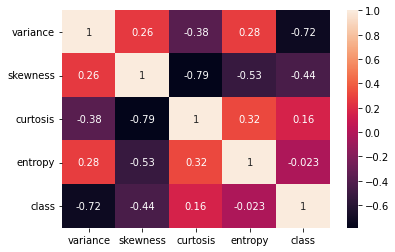

In [4]:
# Correlation Matrix

correl = dataset.corr()
sns.heatmap(correl,annot=True)
plt.show()

Hence important attributes to predict class are : variance, skewness and curtosis

In [5]:
X = dataset[['variance','skewness','curtosis']]
y = dataset['class']
X

,variance,skewness,curtosis
0,3.62160,8.66610,-2.8073
1,4.54590,8.16740,-2.4586
2,3.86600,-2.63830,1.9242
3,3.45660,9.52280,-4.0112
4,0.32924,-4.45520,4.5718
...,...,...,...
1367,0.40614,1.34920,-1.4501
1368,-1.38870,-4.87730,6.4774
1369,-3.75030,-13.45860,17.5932
1370,-3.56370,-8.38270,12.3930


In [6]:
# Splitting data into training and test set

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
                                                    random_state=13)
X_train

,variance,skewness,curtosis
523,2.13190,-2.0403,2.55740
486,3.88320,6.4023,-2.43200
784,-3.40830,4.8587,-0.76888
408,4.22300,1.1319,0.72202
1318,-0.49281,3.0605,-1.83560
...,...,...,...
866,-4.14090,3.4619,-0.47841
742,0.66191,9.6594,-0.28819
74,4.40690,10.9072,-4.57750
176,0.19081,9.1297,-3.72500


In [9]:
# Standardization

sc = StandardScaler()
X_train[['variance','skewness','curtosis']] =  sc.fit_transform(X_train)
X_test[['variance','skewness','curtosis']]  = sc.transform(X_test)
X_train

,variance,skewness,curtosis
523,0.575079,-0.705603,0.309801
486,1.190045,0.760590,-0.881646
784,-1.370354,0.492519,-0.484500
408,1.309365,-0.154700,-0.128480
1318,-0.346584,0.180233,-0.739228
...,...,...,...
866,-1.627606,0.249942,-0.415137
742,0.058894,1.326238,-0.369714
74,1.373941,1.542939,-1.393981
176,-0.106532,1.234247,-1.190408


In [10]:
X_test

,variance,skewness,curtosis
308,1.447367,1.416440,-1.308254
1330,-0.559974,-1.610491,1.135197
472,1.174314,0.722870,-0.788969
304,0.659705,1.467464,-1.019359
33,-0.512432,1.283117,0.112341
...,...,...,...
1174,-1.299001,-0.376070,-0.067914
642,1.628594,-0.356664,-0.223010
883,-1.353534,-0.408054,0.208312
1319,0.059505,-0.359180,-0.345774


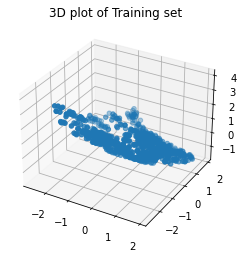

In [11]:
# 3D plot of features

fig = plt.figure()
ax = plt.axes(projection ='3d')

ax.scatter(X_train['variance'],X_train['skewness'],X_train['curtosis'])
ax.set_title('3D plot of Training set')
plt.show()

# Principal Component Analysis

In [12]:
# PCA

pca = PCA(n_components=2)
X_train_2dim = pd.DataFrame(pca.fit_transform(X_train),
                            columns = [['prin_comp1',
                                        'prin_comp2']])

X_test_2dim = pd.DataFrame(pca.transform(X_test),
                            columns = [['prin_comp1',
                                        'prin_comp2']])

X_train_1dim = X_train_2dim['prin_comp1']
X_test_1dim = X_test_2dim['prin_comp1']

X_train_2dim

,prin_comp1,prin_comp2
0,0.410836,-0.850324
1,-1.550447,-0.606319
2,-0.063089,1.521691
3,-0.527711,-1.214560
4,-0.456614,0.530071
...,...,...
955,0.241589,1.647311
956,-1.103047,0.527134
957,-2.456243,-0.370786
958,-1.516537,0.806281


In [13]:
X_train_1dim

,prin_comp1
0,0.410836
1,-1.550447
2,-0.063089
3,-0.527711
4,-0.456614
...,...
955,0.241589
956,-1.103047
957,-2.456243
958,-1.516537


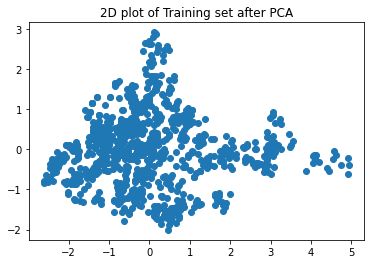

In [14]:
# 2D plot of features

plt.scatter(X_train_2dim['prin_comp1'],X_train_2dim['prin_comp2'])
plt.title('2D plot of Training set after PCA')
plt.show()

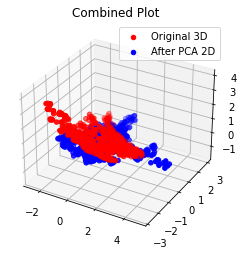

In [15]:
# Combined 3D and 2D plot of features

fig = plt.figure()
ax = plt.axes(projection ='3d')

ax.scatter(X_train['variance'],X_train['skewness'],X_train['curtosis'],color='red')
ax.scatter(X_train_2dim['prin_comp1'],X_train_2dim['prin_comp2'],color='blue')
ax.set_title('Combined Plot')
plt.legend(labels=['Original 3D','After PCA 2D'])
plt.show()

In [32]:
# PCA Info

print('Info retained by PCA components (%) : ',
      [val*100 for val in pca.explained_variance_ratio_])
print()
print('Eigen Values : ',
      pca.explained_variance_)
print()
print('Eigen Vectors : ')
print(pca.components_)

Info retained by PCA components (%) :  [66.02418112135348, 26.98538663843034]

Eigen Values :  [1.98279084 0.81040577]

Eigen Vectors : 
[[-0.41293121 -0.63003301  0.65768246]
 [-0.90224817  0.38148952 -0.20103233]]


# K Nearest Neighbors

Model performance on original training set : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       535
           1       1.00      1.00      1.00       425

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960


Model performance on original test set : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       227
           1       0.99      1.00      1.00       185

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412


Confusion Matrix : 


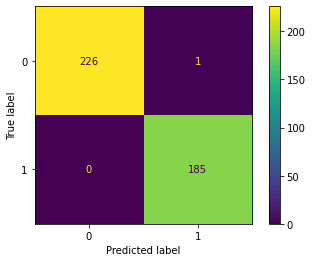

In [26]:
# KNN On Original Dataset

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

print('Model performance on original training set : ')
print()
print(classification_report(y_train,
                            knn.predict(X_train)))

print()
print('Model performance on original test set : ')
print()
print(classification_report(y_test,
                            knn.predict(X_test)))
print()
print('Confusion Matrix : ')
cm_display = ConfusionMatrixDisplay.from_estimator(
             knn, X_test, y_test,
             display_labels=['0','1'])
plt.show()

Model performance after 2D PCA on training set : 

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       535
           1       0.92      0.94      0.93       425

    accuracy                           0.94       960
   macro avg       0.94      0.94      0.94       960
weighted avg       0.94      0.94      0.94       960


Model performance after 2D PCA on test set : 

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       227
           1       0.90      0.88      0.89       185

    accuracy                           0.90       412
   macro avg       0.90      0.90      0.90       412
weighted avg       0.90      0.90      0.90       412


Confusion Matrix : 


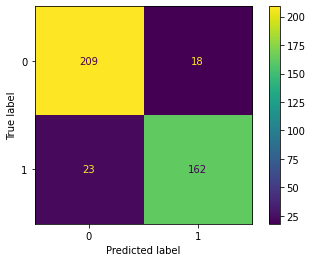

In [28]:
# KNN On 2D PCA

knn = KNeighborsClassifier()
knn.fit(X_train_2dim,y_train)

print('Model performance after 2D PCA on training set : ')
print()
print(classification_report(y_train,
                            knn.predict(X_train_2dim)))

print()
print('Model performance after 2D PCA on test set : ')
print()
print(classification_report(y_test,
                            knn.predict(X_test_2dim)))
print()
print('Confusion Matrix : ')
cm_display = ConfusionMatrixDisplay.from_estimator(
             knn, X_test_2dim, y_test,
             display_labels=['0','1'])
plt.show()

Model performance after 1D PCA on training set : 

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       535
           1       0.78      0.71      0.74       425

    accuracy                           0.78       960
   macro avg       0.78      0.78      0.78       960
weighted avg       0.78      0.78      0.78       960


Model performance after 1D PCA on test set : 

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       227
           1       0.74      0.69      0.72       185

    accuracy                           0.75       412
   macro avg       0.75      0.75      0.75       412
weighted avg       0.75      0.75      0.75       412


Confusion Matrix : 


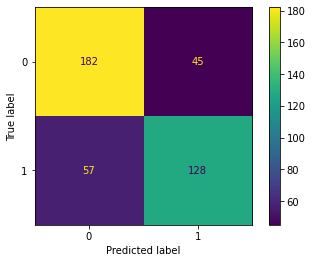

In [29]:
# KNN On 1D PCA

knn = KNeighborsClassifier()
knn.fit(X_train_1dim,y_train)

print('Model performance after 1D PCA on training set : ')
print()
print(classification_report(y_train,
                            knn.predict(X_train_1dim)))

print()
print('Model performance after 1D PCA on test set : ')
print()
print(classification_report(y_test,
                            knn.predict(X_test_1dim)))
print()
print('Confusion Matrix : ')
cm_display = ConfusionMatrixDisplay.from_estimator(
             knn, X_test_1dim, y_test,
             display_labels=['0','1'])
plt.show()

# Comparison of Results

In [31]:
result = pd.DataFrame({'Original':[100,100],
                      '2D PCA':[94,90],
                      '1D PCA':[78,75]},
                      index=['Training Accuracy (%)','Testing Accuracy (%)'])
print('Comparing Performance before and after PCA : \n')
result

Comparing Performance before and after PCA : 



,Original,2D PCA,1D PCA
Training Accuracy (%),100,94,78
Testing Accuracy (%),100,90,75


#### Conclusion : We can reduce dataset to 2 dimensions and still get a 94% accuracy on training set and 90% accuracy on test set hence reducing dataset to 2 dimensions using PCA would be a good choice